# NetCDF files

NetCDF is a binary storage format for many different kinds of rectangular data. Examples include atmosphere and ocean model output, satellite images, and timeseries data. NetCDF files are intended to be device independent, and the dataset may be queried in a fast, random-access way. More information about NetCDF files can be found [here](http://www.unidata.ucar.edu/software/netcdf/). The [CF conventions](http://cfconventions.org) are used for storing NetCDF data for earth system models, so that programs can be aware of the coordinate axes used by the data cubes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cmocean.cm as cmo

import netCDF4

### Sea surface temperature example

An example NetCDF file containing monthly means of sea surface temperature over 160 years can be found [here](http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v4.html). We'll use the NetCDF4 package to read this file, which has already been saved into the `data` directory.

In [2]:
nc = netCDF4.Dataset('../data/sst.mnmean.v4.nc')
nc['sst'].shape

(1946, 89, 180)

In [3]:
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    history: created 10/2014 by CAS using NCDC's ERSST V4 ascii values
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    citation: Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.
    comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    Conventions: CF-1.2
    institution: This version written at NOAA/ES

The representation of the object shows some of the attributes of the netCDF file. The final few lines show the dimensions and the variable names (with corresponding dimensions). Another representation of the file can be seen using the `ncdump` command. This is similar to the output of the command (at a command-line prompt, not within python) 

    $ ncdump -h ../data/sst.mnmean.v4.nc
     
    netcdf sst.mnmean.v4 {
    dimensions:
        lon = 180 ;
        lat = 89 ;
        nbnds = 2 ;
        time = UNLIMITED ; // (1946 currently)
    variables:
        float lat(lat) ;
            lat:units = "degrees_north" ;
            lat:long_name = "Latitude" ;
            lat:actual_range = 88.f, -88.f ;
            lat:standard_name = "latitude" ;
            lat:axis = "Y" ;
            lat:coordinate_defines = "center" ;
        float lon(lon) ;
            lon:units = "degrees_east" ;
            lon:long_name = "Longitude" ;
            lon:actual_range = 0.f, 358.f ;
            lon:standard_name = "longitude" ;
            lon:axis = "X" ;
            lon:coordinate_defines = "center" ;
        double time_bnds(time, nbnds) ;
            time_bnds:long_name = "Time Boundaries" ;
        double time(time) ;
            time:units = "days since 1800-1-1 00:00:00" ;
            time:long_name = "Time" ;
            time:delta_t = "0000-01-00 00:00:00" ;
            time:avg_period = "0000-01-00 00:00:00" ;
            time:prev_avg_period = "0000-00-07 00:00:00" ;
            time:standard_name = "time" ;
            time:axis = "T" ;
            time:actual_range = 19723., 78923. ;
        float sst(time, lat, lon) ;
            sst:long_name = "Monthly Means of Sea Surface Temperature" ;
            sst:units = "degC" ;
            sst:var_desc = "Sea Surface Temperature" ;
            sst:level_desc = "Surface" ;
            sst:statistic = "Mean" ;
            sst:missing_value = -9.96921e+36f ;
            sst:actual_range = -1.8f, 33.95f ;
            sst:valid_range = -5.f, 40.f ;
            sst:dataset = "NOAA Extended Reconstructed SST V4" ;
            sst:parent_stat = "Individual Values" ;

    // global attributes:
            :history = "created 10/2014 by CAS using NCDC\'s ERSST V4 ascii values" ;
    [....and so on....]

You can access terminal commands from with the Jupyter notebook by putting "!" first:

In [4]:
!ncdump -h ../data/sst.mnmean.v4.nc

netcdf sst.mnmean.v4 {
dimensions:
	lon = 180 ;
	lat = 89 ;
	nbnds = 2 ;
	time = UNLIMITED ; // (1946 currently)
variables:
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:long_name = "Latitude" ;
		lat:actual_range = 88.f, -88.f ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
		lat:coordinate_defines = "center" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "Longitude" ;
		lon:actual_range = 0.f, 358.f ;
		lon:standard_name = "longitude" ;
		lon:axis = "X" ;
		lon:coordinate_defines = "center" ;
	double time_bnds(time, nbnds) ;
		time_bnds:long_name = "Time Boundaries" ;
	double time(time) ;
		time:units = "days since 1800-1-1 00:00:00" ;
		time:long_name = "Time" ;
		time:delta_t = "0000-01-00 00:00:00" ;
		time:avg_period = "0000-01-00 00:00:00" ;
		time:prev_avg_period = "0000-00-07 00:00:00" ;
		time:standard_name = "time" ;
		time:axis = "T" ;
		time:actual_range = 19723., 78923. ;
	float sst(time, lat, lon) ;
		sst:long_name = "Monthly Means

### Mapping the netcdf object to the python object

We can query the data within the NetCDF file using the NetCDF object. The structure of the object (the composition of the methods and attributes) is designed to mirror the data structure in the file. See how these queries give the same information as the textual representation above.

In [5]:
# `Global` attributes of the file
nc.history

"created 10/2014 by CAS using NCDC's ERSST V4 ascii values"

In [6]:
# Variables are stored in a dictionary
nc.variables['lon']  # this is a variable object, just a pointer to the variable. NO DATA HAS BEEN LOADED!

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [   0.  358.]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
# Variable objects also have attributes
nc.variables['lon'].units

'degrees_east'

In [8]:
# we can also query the dimensions
nc.dimensions['lon']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180

In [9]:
# to find the length of a dimension, do
len(nc.dimensions['lon'])

180

In [10]:
# A list of the dimensions can be found by looking at the keys in the dimensions dictionary
nc.dimensions.keys()

odict_keys(['lon', 'lat', 'nbnds', 'time'])

In [11]:
# Same for variables
nc.variables.keys()

odict_keys(['lat', 'lon', 'time_bnds', 'time', 'sst'])

In [12]:
# Let's take a look at the main 3D variable
nc['sst'] # A shorthand for nc.variables['sst']

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    missing_value: -9.96921e+36
    actual_range: [ -1.79999995  33.95000076]
    valid_range: [ -5.  40.]
    dataset: NOAA Extended Reconstructed SST V4
    parent_stat: Individual Values
unlimited dimensions: time
current shape = (1946, 89, 180)
filling on, default _FillValue of 9.969209968386869e+36 used

In [13]:
nc['sst'].units

'degC'

---
### *Exercise*

> Inspect the NetCDF object. 

>  1. What are the units of the time variable?
>  1. What are the dimensions of the latitude variable?
>  1. What is the length of the latitude dimension?

---

In [14]:
# We can extract data from the file by indexing:
# This reads in the data so be careful how much you read in at once
lon = nc['lon'][:]
lat = nc['lat'][:]
sst = nc['sst'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.

In [15]:
# Extract the time variable using the convenient num2date, which converts from time numbers to datetime objects
time = netCDF4.num2date(nc['time'][:], nc['time'].units)
time

array([datetime.datetime(1854, 1, 1, 0, 0),
       datetime.datetime(1854, 2, 1, 0, 0),
       datetime.datetime(1854, 3, 1, 0, 0), ...,
       datetime.datetime(2015, 12, 1, 0, 0),
       datetime.datetime(2016, 1, 1, 0, 0),
       datetime.datetime(2016, 2, 1, 0, 0)], dtype=object)

There are lots of operations you can do with `datetime` objects, some of which you've used before, possibly in other packages like `pandas`.

For example, you can find the difference between two datetimes. This is given in a `datetime.timedelta` object.

In [16]:
time[2] - time[1]

datetime.timedelta(28)

You can also specify the time unit of measurement you get out of this difference:

In [17]:
(time[2] - time[1]).days

28

Note that asking for the number of seconds (from 0 to 60 for that datetime object) is different than asking for the number of total seconds (total number of seconds in the time measurement):

In [18]:
(time[2] - time[1]).seconds

0

In [19]:
(time[2] - time[1]).total_seconds()

2419200.0

---
### *Exercise*

> Practice with `datetime`:

>  1. Find the number of days between several successive `datetimes` in the `time` variable. You will need to extract this number from the `timedelta` object.
>  1. One way you want present the date and time contained within a `datetime` object is with:
        time[0].isoformat()
      Test this, and also try using the following to display your datetime as a string:
        time[0].strftime([input formats])
      where you choose time formats from the options which can be seen at `strftime.org`.

---

Let's use the data that we have read in to make a plot.

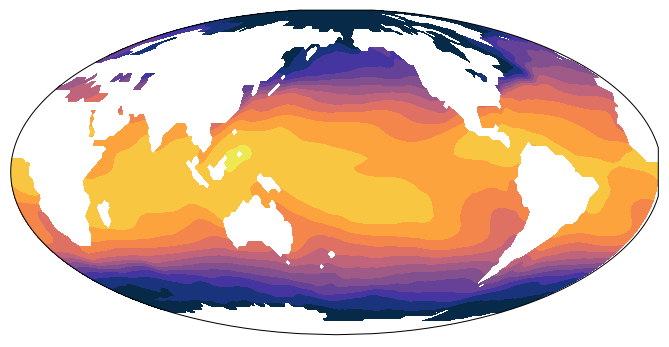

In [22]:
proj = cartopy.crs.Mollweide(central_longitude=180)
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(lon, lat, sst, 10, cmap=cmo.thermal, transform=pc)

---
### *Exercise*

> Finish the plot above. Add:
> * Land
> * Colorbar with proper label and units
> * Title with nicely formatting date and time

---

### THREDDS example. Loading data from a remote dataset.

The netCDF library can be compiled such that it is 'THREDDS enabled', which means that you can put in a URL instead of a filename. This allows access to large remote datasets, without having to download the entire file. You can find a large list of datasets served via an OpenDAP/THREDDs server [here](http://apdrc.soest.hawaii.edu/data/data.php).

Let's look at the ESRL/NOAA 20th Century Reanalysis – Version 2. You can access the data by the following link (this is the link of the `.dds` and `.das` files without the extension.):

In [23]:
loc = 'http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel/V2c/cprat'

In [24]:
nc_cprat = netCDF4.Dataset(loc)

In [25]:
nc_cprat['cprat'].long_name

'daily convective precipitation rate (kg/m^2/s) '

In [26]:
time = netCDF4.num2date(nc_cprat['time'][:], nc_cprat['time'].units)  # convert to datetime objects

In [27]:
time

array([datetime.datetime(1851, 1, 1, 0, 0),
       datetime.datetime(1851, 1, 2, 0, 0),
       datetime.datetime(1851, 1, 3, 0, 0), ...,
       datetime.datetime(2014, 12, 29, 0, 0),
       datetime.datetime(2014, 12, 30, 0, 0),
       datetime.datetime(2014, 12, 31, 0, 0)], dtype=object)

In [28]:
cprat = nc_cprat['cprat'][-1]   # get the last time, datetime.datetime([year], 12, 31, 0, 0)
lon = nc_cprat['lon'][:]
lat = nc_cprat['lat'][:]

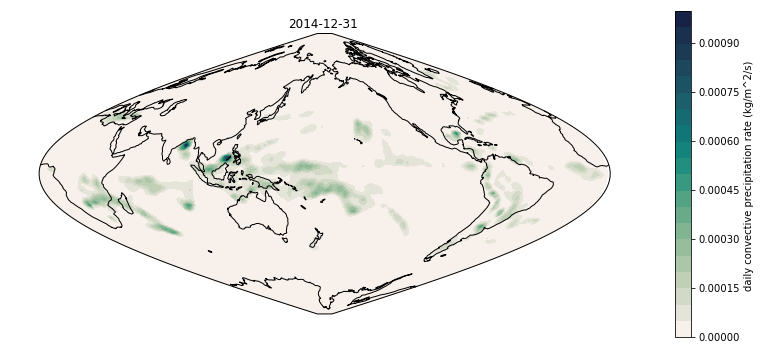

In [29]:
proj = cartopy.crs.Sinusoidal(central_longitude=180)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.25)
mappable = ax.contourf(lon, lat, cprat, 20, cmap=cmo.tempo, transform=pc)
ax.set_title(time[-1].isoformat()[:10])
fig.colorbar(mappable).set_label('%s' % nc_cprat['cprat'].long_name)

---
### *Exercise*

> Pick another [variable](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel) from this dataset. Inspect and plot the variable in a similar manner to precipitation.

> Find another dataset on a THREDDS server at SOEST (or elsewhere), pick a variable, and plot it.

---

### Creating NetCDF files

We can also create a NetCDF file to store data. It is a bit of a pain. Later we will see an easier way to do this.

In [30]:
from matplotlib import tri

Ndatapoints = 1000
Ntimes = 20
Nbad = 200

xdata = np.random.rand(Ndatapoints)
ydata = np.random.rand(Ndatapoints)
time = np.arange(Ntimes)

# create a progressive wave
fdata = np.sin((xdata+ydata)[np.newaxis, :]*5.0 + 
               time[:, np.newaxis]/3.0)

# remove some random 'bad' data.
idx = np.arange(fdata.size)
np.random.shuffle(idx)
fdata.flat[idx[:Nbad]] = np.nan

ygrid, xgrid = np.mgrid[0:1:60j, 0:1:50j]
fgrid = np.ma.empty((Ntimes, 60, 50), 'd')

# interpolate
for n in range(Ntimes):
    igood = ~np.isnan(fdata[n])
    t = tri.Triangulation(xdata[igood], ydata[igood])
    interp = tri.LinearTriInterpolator(t, fdata[n][igood])
    fgrid[n] = interp(xgrid, ygrid)

# create netCDF file

nc = netCDF4.Dataset('foo.nc', 'w')
nc.author = 'Me'

nc.createDimension('x', 50)
nc.createDimension('y', 60)
nc.createDimension('time', None)    # An 'unlimited' dimension. 

nc.createVariable('f', 'd', ('time', 'y', 'x'))
nc.variables['f'][:] = fgrid
nc.variables['f'].units = 'meters sec-1'

nc.createVariable('x', 'd', ('x',))
nc.variables['x'][:] = xgrid[0, :]
nc.variables['x'].units = 'meters'

nc.createVariable('y', 'd', ('y',))
nc.variables['y'][:] = ygrid[:, 0]
nc.variables['y'].units = 'meters'

nc.createVariable('time', 'd', ('time',))
nc.variables['time'][:] = time
nc.variables['time'].units = 'seconds'

nc.close()


In [31]:
nc = netCDF4.Dataset('foo.nc')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    author: Me
    dimensions(sizes): x(50), y(60), time(20)
    variables(dimensions): float64 f(time,y,x), float64 x(x), float64 y(y), float64 time(time)
    groups: 

### See also

- [Xarray](http://xarray.pydata.org/en/stable/): NetCDF + PANDAS + CF conventions. Awesome.
- [pygrib](https://github.com/jswhit/pygrib): Reading GRIB files.
- [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html): Not python, but a very useful NetCDF file viewer.

# `xarray`

`xarray` expands the utility of the time series analysis package `pandas` into more than one dimension. It is actively being developed so some functionality isn't yet available, but for certain analysis it is very useful.

In [32]:
import xarray as xr

In the previous material, we used `netCDF` directly to read in a data file, then access the data:

In [33]:
nc = netCDF4.Dataset('../data/sst.mnmean.v4.nc')

print(nc['sst'].shape)

(1946, 89, 180)


However, as was pointed out in class, in this approach if we want to pull out the sea surface temperature data at a particular time, we need to first know which time index that particular time corresponds to. How can we find this?

First we convert the time numbers from the file into datetimes, like before:

In [34]:
# Extract the time variable using the convenient num2date
time = netCDF4.num2date(nc['time'][:], nc['time'].units)

In [35]:
time

array([datetime.datetime(1854, 1, 1, 0, 0),
       datetime.datetime(1854, 2, 1, 0, 0),
       datetime.datetime(1854, 3, 1, 0, 0), ...,
       datetime.datetime(2015, 12, 1, 0, 0),
       datetime.datetime(2016, 1, 1, 0, 0),
       datetime.datetime(2016, 2, 1, 0, 0)], dtype=object)

Say we want to search for the time index corresponding to May 1, 1954.

In [36]:
from datetime import datetime

date = datetime(1954, 5, 1, 0, 0)

Now we search for the time index:

In [37]:
tind = np.where(time==date)[0][0]
print(tind)

1204


Great! So the time index we want is 1204. We can now make our sea surface temperature plot:

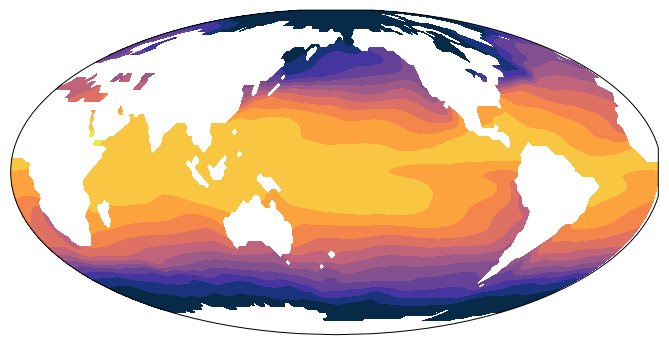

In [38]:
proj = cartopy.crs.Mollweide(central_longitude=180)
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(nc['lon'][:], nc['lat'][:], nc['sst'][tind], 10, cmap=cmo.thermal, transform=pc)

What if instead we want the index corresponding to May 23, 1954

In [39]:
date = datetime(1954, 5, 23, 0, 0)
np.where(time==date)

(array([], dtype=int64),)

What is the problem here? There is no data at that exact time.

So what should we do?

A few options:

In [40]:
# index of date that minimizes time between model times and desired date
tidx = np.abs(time - date).argmin()
tidx

1205

In [41]:
time[tidx]

datetime.datetime(1954, 6, 1, 0, 0)

In [42]:
np.where(time<=date)[0][-1]

1204

So, you can so this but it's a little annoying and takes extra effort.

Now let's access this data using a different package called `xarray`:

In [43]:
ds = xr.open_dataset('../data/sst.mnmean.v4.nc')  # similar way to read in — also works for nonlocal data addresses
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 1946)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 1854-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 1.972e+04 1.975e+04 1.975e+04 1.978e+04 ...
    sst        (time, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...
Attributes:
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by c

Now we can search for data in May 1954:

In [44]:
ds['sst'].sel(time=slice('1954-05','1954-05'))

<xarray.DataArray 'sst' (time: 1, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 70.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * time     (time) datetime64[ns] 1954-05-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [ -1.79999995  33.95000076]
    valid_range:   [ -5.  40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

Or we can search for the nearest output to May 23, 1954:

In [45]:
ds['sst'].sel(time='1954-05-23', method='nearest')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 70.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [ -1.79999995  33.95000076]
    valid_range:   [ -5.  40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

Let's plot it!

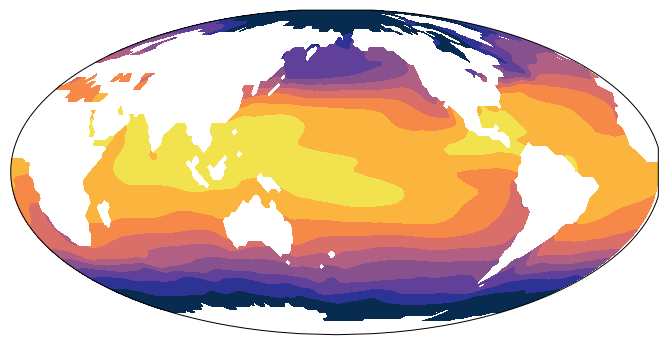

In [62]:
sst = ds['sst'].sel(time='1954-05-23', method='nearest')

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(nc['lon'][:], nc['lat'][:], sst, 10, cmap=cmo.thermal, transform=pc)

Note that you can also just plot against the included coordinates with built-in convenience functions (this is analogous to `pandas` which was for one dimension):

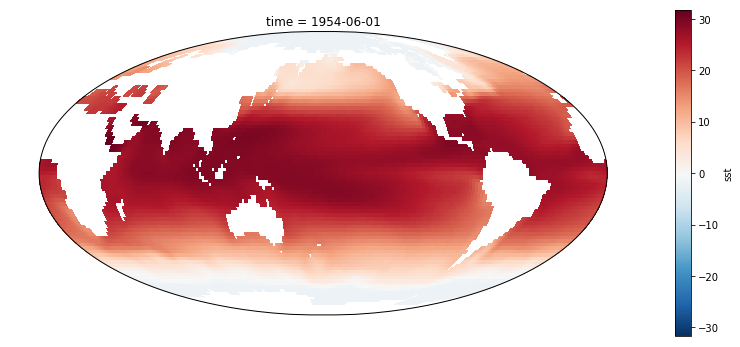

In [47]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
sst.plot(transform=pc)  # the plot's projection

## GroupBy

Like in `pandas`, we can use the `groupby` method to do some neat things. Let's group by season and save a new file.

In [48]:
seasonal_mean = ds.groupby('time.season').mean('time')
seasonal_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, season: 4)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (season, nbnds) float64 4.937e+04 4.94e+04 4.931e+04 ...
    sst        (season, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...

Do you remember how many lines of code were required to save a netCDF file from scratch? It is straight-forward, but tedious. Once you are working with data using `xarray`, you can save new, derived files very easily from your data array:

In [49]:
fname = 'test.nc'
seasonal_mean.to_netcdf(fname)

In [50]:
d = netCDF4.Dataset(fname)
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(89), lon(180), season(4), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time_bnds(season,nbnds), float64 sst(season,lat,lon), <class 'str'> season(season)
    groups: 

---
### *Exercise*

> Plot the difference between summer and winter mean sea surface temperature.

---